# FEATURE IMPORTANCE WITH RANDOM FOREST REGRESSOR

**IMPORT LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

**LOADING THE DATASET**

In [2]:
data = pd.read_csv('vehicle_data.csv')
data.head()

,Type,Manufacturer,Model,Year,Color,Horsepower,Fuel_Type,Mileage,Price,Weight,...,Height (m),Fuel_Efficiency (km/l),Number_of_Doors,Seating_Capacity,Max_Speed (km/h),Acceleration (0-100 km/h),Engine_Displacement (cc),Safety_Rating,Infotainment_System,Interest
0,Truck,Ford,Civic,1991,Red,313.197822,Diesel,14.116445,75082.49988,3945.321832,...,1.625475,29.075846,5,12,201.299397,8.960149,1617.844000,4.733258,Advanced,6.635196
1,Motorcycle,Toyota,X5,1993,Silver,353.914427,Gasoline,14.227989,69283.34802,4520.914547,...,1.729760,17.453719,4,12,157.702499,8.279956,4063.539234,4.034559,Standard,5.527563
2,Bus,Ford,Camry,2008,Black,203.726316,Diesel,12.450292,65260.45194,4375.374672,...,1.764894,12.022325,2,5,268.394164,7.411610,1626.474930,3.143818,Basic,9.358534
3,Truck,BMW,Civic,2004,Red,271.670172,Diesel,8.442322,41307.88173,2961.585981,...,1.555781,21.305136,5,12,136.711822,6.141604,3841.203298,1.795054,Basic,4.275407
4,Truck,Honda,Camry,1995,Black,74.364984,Electric,11.814102,16540.18848,1618.106395,...,1.895537,12.463086,5,12,148.965613,7.973378,2228.796299,2.686838,Standard,4.809529


**ONE-HOT ENCODING and SEPARATING THE FEATURES (X) and TARGET (Y)**

In [3]:
X=data.drop('Interest', axis=1)
Y=data['Interest']
categorical_cols = ['Type', 'Manufacturer', 'Model', 'Color', 'Fuel_Type', 'Infotainment_System']
encoder = OneHotEncoder(sparse_output=False)
X_encoded = encoder.fit_transform(X[categorical_cols])
encoded_cols = encoder.get_feature_names_out(categorical_cols)
X_encoded = pd.DataFrame(X_encoded, columns=encoded_cols, index=X.index)
print(X_encoded)
X_final = pd.concat([X.drop(categorical_cols, axis=1), X_encoded], axis=1)
print(X_final)

    Type_Bicycle  Type_Bus  Type_Car  Type_Motorcycle  Type_Truck  \
0            0.0       0.0       0.0              0.0         1.0   
1            0.0       0.0       0.0              1.0         0.0   
2            0.0       1.0       0.0              0.0         0.0   
3            0.0       0.0       0.0              0.0         1.0   
4            0.0       0.0       0.0              0.0         1.0   
..           ...       ...       ...              ...         ...   
95           0.0       0.0       0.0              0.0         1.0   
96           0.0       0.0       0.0              0.0         1.0   
97           1.0       0.0       0.0              0.0         0.0   
98           0.0       0.0       1.0              0.0         0.0   
99           0.0       1.0       0.0              0.0         0.0   

    Manufacturer_BMW  Manufacturer_Chevrolet  Manufacturer_Ford  \
0                0.0                     0.0                1.0   
1                0.0                 

**VISUALIZING RELATIONSHIPS BETWEEN VARIABLES**

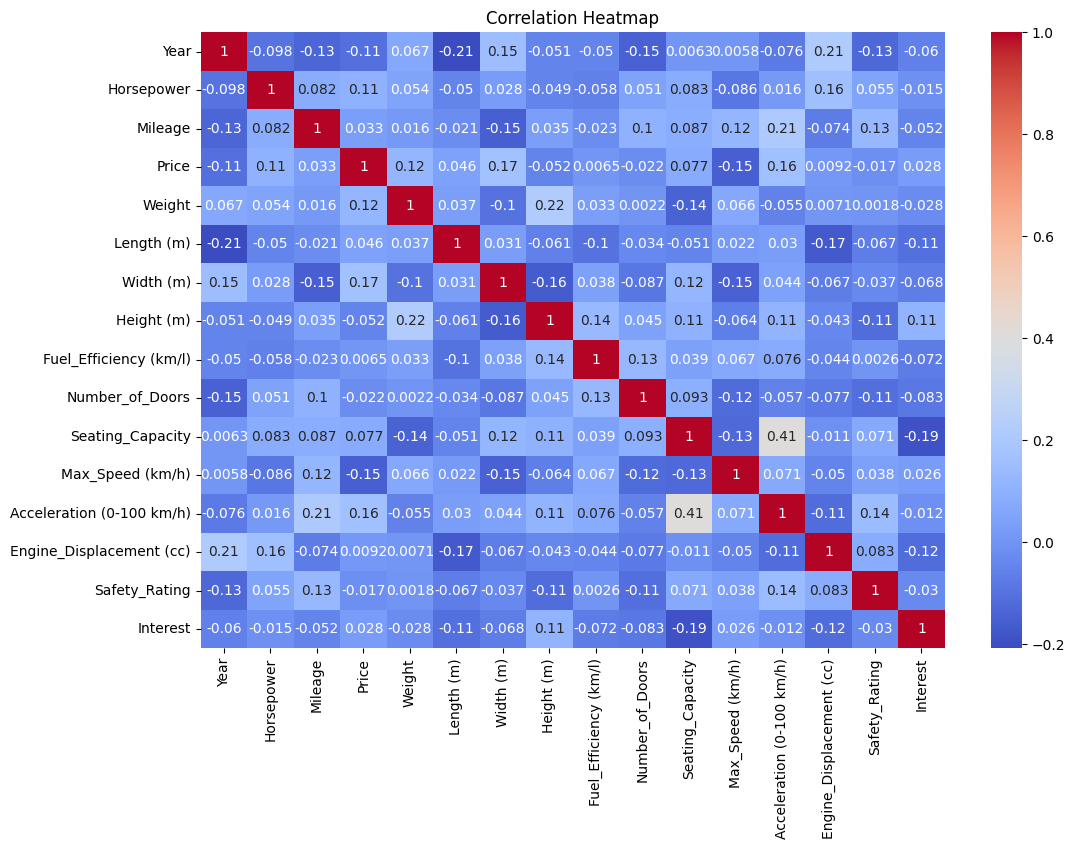

In [4]:
#correlation heatmap
numeric_data = data.select_dtypes(include=[np.number])
corr = numeric_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**TRAIN AND TEST DATA SPLIT**

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X_final, Y, test_size=0.2, random_state=42)

**FEATURE IMPORTANCE**

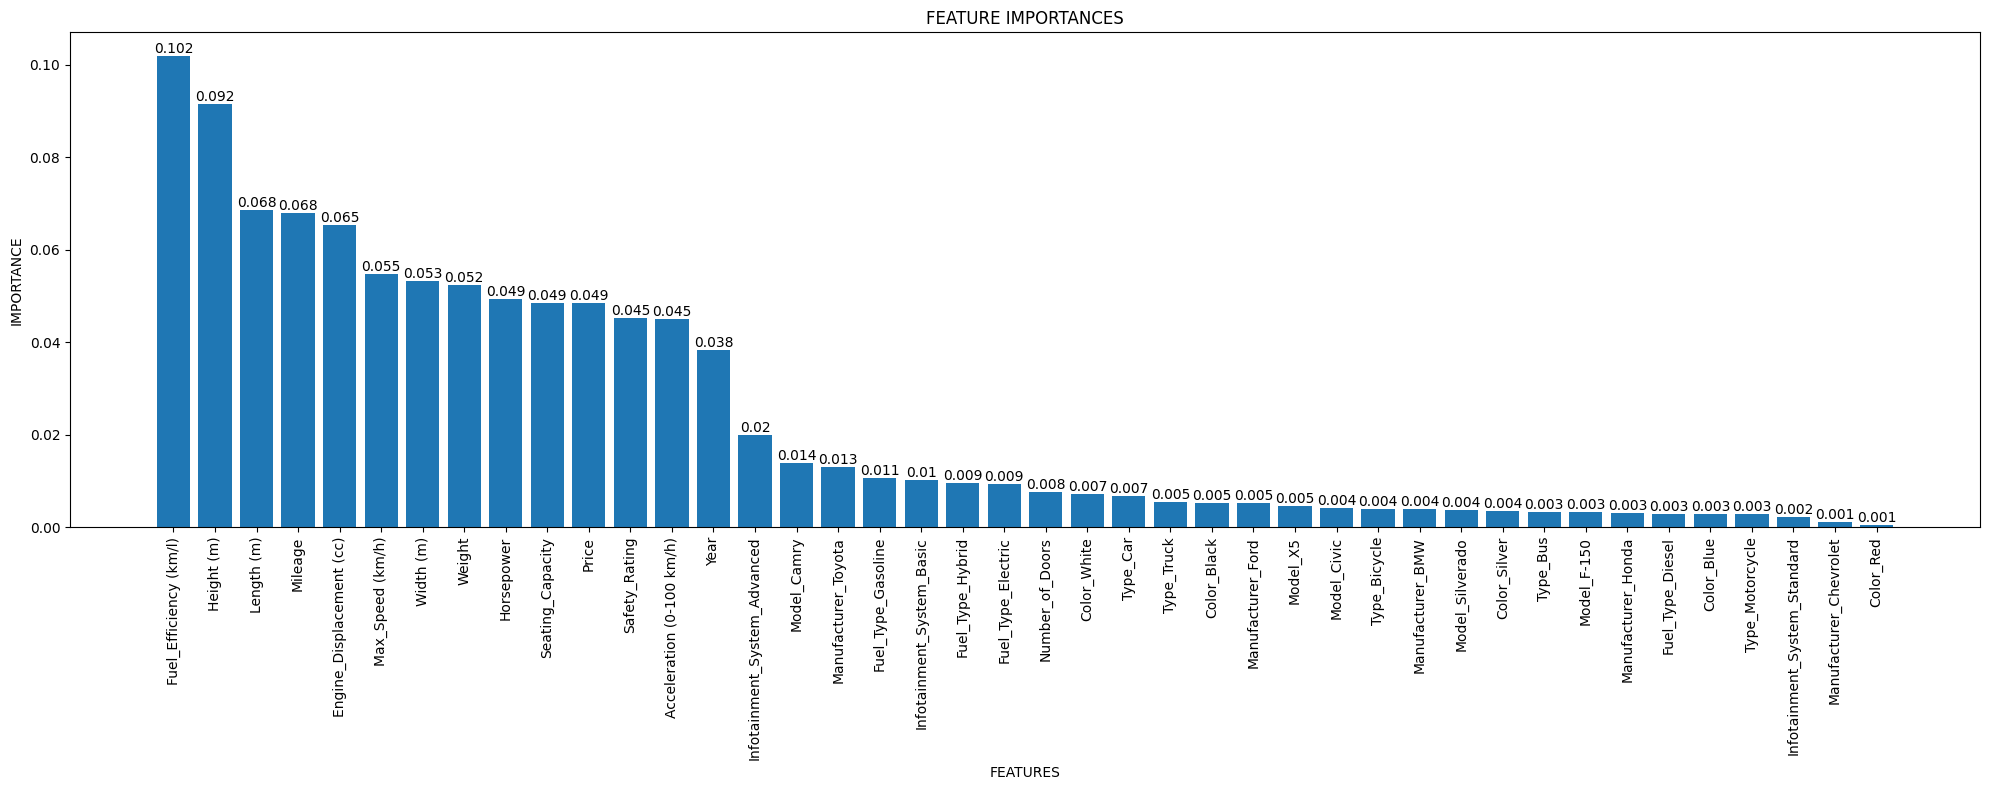

In [6]:
model = RandomForestRegressor()
model.fit(X_train, Y_train)

importances = model.feature_importances_
feature_names = X_final.columns

# Create a DataFrame with selected feature names and importance scores
selected_feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance scores in descending order
selected_feature_importances = selected_feature_importances.sort_values('Importance', ascending=False)

# Plot the feature importances with values displayed inside the bars
plt.figure(figsize=(20, 8))
plt.title("FEATURE IMPORTANCES")
bars = plt.bar(selected_feature_importances['Feature'], selected_feature_importances['Importance'])
plt.xlabel("FEATURES")
plt.ylabel("IMPORTANCE")
plt.xticks(rotation=90)
plt.tight_layout()

# Add value labels to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 3), ha='center', va='bottom')

plt.show()


**MODEL TRAINING WITH CROSS VALIDATION**

Cross-Validation RMSE Scores: [3.57615346 2.58091738 2.88463242 3.35152028 2.36625937]
Mean Cross-Validation RMSE: 2.951896582626862


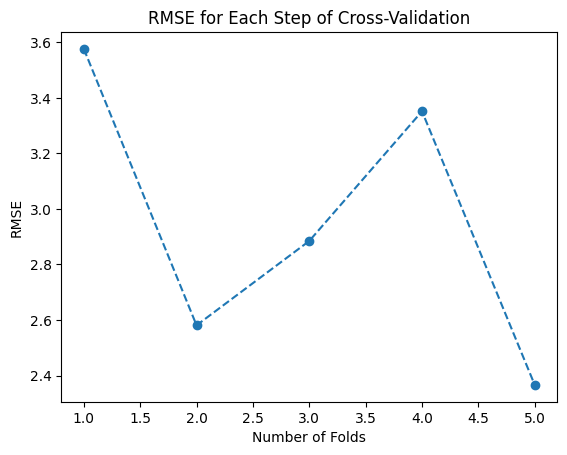

In [7]:
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, Y_train)
cv_scores = cross_val_score(rf_regressor, X_train, Y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = (-cv_scores) ** 0.5
print("Cross-Validation RMSE Scores:", cv_rmse_scores)
print("Mean Cross-Validation RMSE:", cv_rmse_scores.mean())

# Plotting RMSE for each step of cross-validation
plt.plot(range(1, 6), cv_rmse_scores, marker='o', linestyle='--')
plt.xlabel('Number of Folds')
plt.ylabel('RMSE')
plt.title('RMSE for Each Step of Cross-Validation')
plt.show()

**MEAN SQUARED ERROR**

In [8]:
# Predict on the test set
y_pred_test = rf_regressor.predict(X_test)

# Calculating Mean Squared Error and Mean Absolute Error
mse = mean_squared_error(Y_test, y_pred_test)
mae = mean_absolute_error(Y_test, y_pred_test)

print("Mean Squared Error: {:.3f}".format(mse))
print("Mean Absolute Error: {:.3f}".format(mae))

Mean Squared Error: 6.531
Mean Absolute Error: 2.178


**MSE CURVE for TRAIN and TEST**

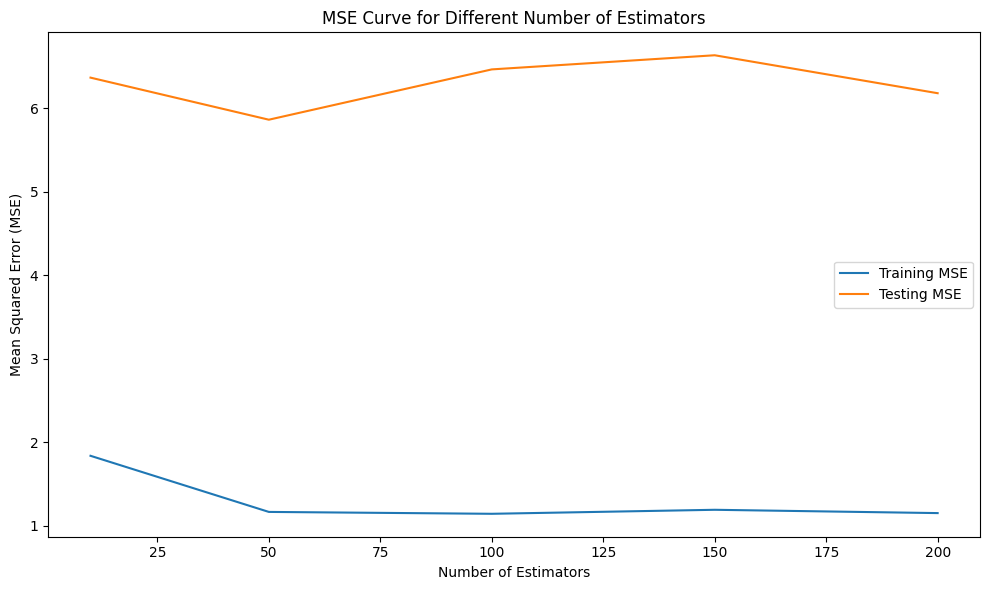

In [11]:
num_estimators = [10, 50, 100, 150, 200]
train_errors = []
test_errors = []
for n in num_estimators:
    model = RandomForestRegressor(n_estimators=n)
    model.fit(X_train, Y_train)
    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)
    train_error = mean_squared_error(Y_train, Y_train_pred)
    test_error = mean_squared_error(Y_test, Y_test_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)

plt.figure(figsize=(10, 6))
plt.plot(num_estimators, train_errors, label='Training MSE')
plt.plot(num_estimators, test_errors, label='Testing MSE')
plt.title('MSE Curve for Different Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.tight_layout()
plt.show()


**ACTUAL vs PREDICTED**

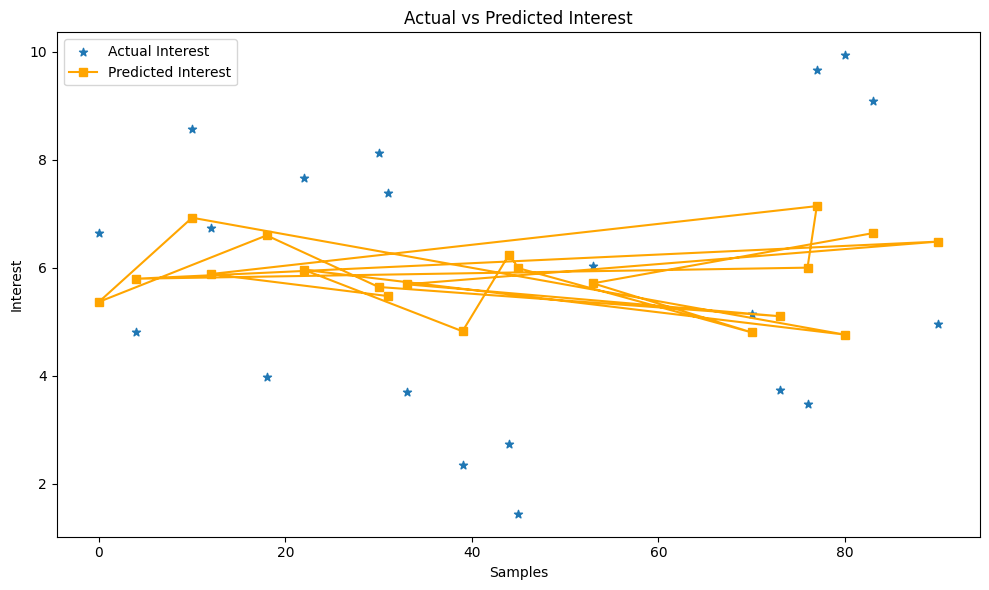

In [10]:
# Make predictions on the test set
Y_pred = model.predict(X_test)

# Creating a DataFrame with actual and predicted values
comparison = pd.DataFrame({'Actual Interest': Y_test, 'Predicted Interest': Y_pred})

# Plot
plt.figure(figsize=(10, 6))
plt.title("Actual vs Predicted Interest")
plt.scatter(comparison.index, comparison['Actual Interest'], label='Actual Interest', marker='*')
plt.plot(comparison.index, comparison['Predicted Interest'], label='Predicted Interest', linestyle='-', marker='s', color='orange')
plt.xlabel("Samples")
plt.ylabel("Interest")
plt.legend()
plt.tight_layout()
plt.show()